# pydicom中的数据元素——Dataset

## 读取 `dcmread()`

In [1]:
import pydicom
from pydicom.data import get_testdata_file
# get some test data
filename = get_testdata_file("rtplan.dcm")
ds = pydicom.dcmread(filename)

## 信息获取 DataElement

In [7]:
# 1. 直接输出Dataset
print(ds)
# ds

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 156
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: RT Plan Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.999.999.99.9.9999.9999.20030903150023
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.888.888.88.8.8.8
-------------------------------------------------
(0008, 0012) Instance Creation Date              DA: '20030903'
(0008, 0013) Instance Creation Time              TM: '150031'
(0008, 0016) SOP Class UID                       UI: RT Plan Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.777.777.77.7.7777.7777.20030903150023
(0008, 0020) Study Date                          DA: '20030716'
(0008, 0030) Study Time                          TM: '153557'
(0008, 0050) Accession Number                

In [14]:
# 2. 指定元素
print(ds.PatientName)
print("DataElement: ",ds[0x10,0x10])
print("DataElement的值： ", ds[0x10,0x10].value)

Last^First^mid^pre
DataElement:  (0010, 0010) Patient's Name                      PN: 'Last^First^mid^pre'
DataElement的值：  Last^First^mid^pre


DataElement 的序列性（Squence）

In [29]:
print("ds: ", type(ds))
print("ds.BeamSequence: ", type(ds.BeamSequence))
print("len(): ", len(ds.BeamSequence))
print(ds.BeamSequence)

ds:  <class 'pydicom.dataset.FileDataset'>
ds.BeamSequence:  <class 'pydicom.sequence.Sequence'>
len():  1
[(0008, 0070) Manufacturer                        LO: 'Linac co.'
(0008, 0080) Institution Name                    LO: 'Here'
(0008, 1040) Institutional Department Name       LO: 'Radiation Therap'
(0008, 1090) Manufacturer's Model Name           LO: 'Zapper9000'
(0018, 1000) Device Serial Number                LO: '9999'
(300a, 00b2) Treatment Machine Name              SH: 'unit001'
(300a, 00b3) Primary Dosimeter Unit              CS: 'MU'
(300a, 00b4) Source-Axis Distance                DS: "1000.0"
(300a, 00b6)  Beam Limiting Device Sequence  2 item(s) ---- 
   (300a, 00b8) RT Beam Limiting Device Type        CS: 'X'
   (300a, 00bc) Number of Leaf/Jaw Pairs            IS: "1"
   ---------
   (300a, 00b8) RT Beam Limiting Device Type        CS: 'Y'
   (300a, 00bc) Number of Leaf/Jaw Pairs            IS: "1"
   ---------
(300a, 00c0) Beam Number                         IS: "1"
(3

In [33]:
# Squence是一个基于列表list的类，其中的元素是Dataset
# 这里的BeamSquence长度为1
print("ds.BeamSequence[0]: ", type(ds.BeamSequence[0]))
print(ds.BeamSequence[0].BeamName)

ds.BeamSequence[0]:  <class 'pydicom.dataset.Dataset'>
Field 1


In [34]:
# 同样可以用tag number访问
ds[0x300a,0xb0][0][0x300a,0xc2].value


'Field 1'

标签名（Tag Name）查询函数——`ds.dir()`

In [39]:
print("全部非私有tag: ", ds.dir())
print("搜索字符： ", ds.dir('pat'))

全部非私有tag:  ['AccessionNumber', 'ApprovalStatus', 'BeamSequence', 'DoseReferenceSequence', 'FractionGroupSequence', 'InstanceCreationDate', 'InstanceCreationTime', 'InstitutionName', 'InstitutionalDepartmentName', 'Manufacturer', 'ManufacturerModelName', 'Modality', 'OperatorsName', 'PatientBirthDate', 'PatientID', 'PatientName', 'PatientSetupSequence', 'PatientSex', 'RTPlanDate', 'RTPlanGeometry', 'RTPlanLabel', 'RTPlanName', 'RTPlanTime', 'ReferencedRTPlanSequence', 'ReferencedStructureSetSequence', 'ReferringPhysicianName', 'SOPClassUID', 'SOPInstanceUID', 'SeriesInstanceUID', 'SeriesNumber', 'SoftwareVersions', 'StationName', 'StudyDate', 'StudyID', 'StudyInstanceUID', 'StudyTime']
搜索字符：  ['PatientBirthDate', 'PatientID', 'PatientName', 'PatientSetupSequence', 'PatientSex']


In [49]:
# 判断tag name是否在dataset中
print("PatientName" in ds)
print("PatientNama" in ds)

True
False


C:\Code\anaconda3\lib\site-packages\pydicom\dataset.py:516: UserWarning: Invalid value used with the 'in' operator: must be an element tag as a 2-tuple or int, or an element keyword
  warnings.warn(msg)


DataElement与其值

In [47]:
# 获取DataElement对象
print(type(ds["PatientName"]))
print(type(ds[0x0010,0x0010]))
# 获取值
print(ds.PatientName)
print(ds["PatientName"].value)
print(ds[0x0010,0x0010].value)

<class 'pydicom.dataelem.DataElement'>
<class 'pydicom.dataelem.DataElement'>
Last^First^mid^pre
Last^First^mid^pre
Last^First^mid^pre


删除元素

In [51]:
print(ds.SoftwareVersions)
del ds.SoftwareVersions
print(ds.SoftwareVersions)

softwareV1


AttributeError: 'FileDataset' object has no attribute 'SoftwareVersions'

## 获取图像数据

默认获取bytes原始数据

In [2]:
import pydicom
from pydicom.data import get_testdata_file
filename = get_testdata_file("MR_small.dcm")
ds = pydicom.dcmread(filename)
print(ds["PixelData"])
pixel_bytes = ds.PixelData
print(pixel_bytes)

(7fe0, 0010) Pixel Data                          OW: Array of 8192 elements
b'\x89\x03\xfb\x03\xcb\x04\xeb\x04\xf9\x02\x94\x01\x7f\x02\x92\x038\x05a\x08g\x04%\x04=\x03\x1e\x02\x86\x01i\x01l\x01\x7f\x01\x8d\x01\x92\x01\x90\x01`\x01C\x011\x01,\x01;\x01Z\x016\x01\x8b\x01\xb7\x01\xcb\x01\xa6\x01?\x01i\x01\x83\x01\xb1\x01s\x010\x01+\x01\x10\x01\x13\x01x\x01J\x02\xfb\x02\x9f\x03\xa4\x04\xe2\x03\xc9\x02\x17\x02\x89\x01\xb5\x01\xa1\x01Q\x01\\\x01\r\x01\x17\x01!\x01)\x01\x18\x01\x11\x01\x03\x01.\x010\x01H\x01t\x02\x02\x03\x8b\x03\x8e\x04(\x04H\x02\x89\x01g\x02\x8c\x03\xff\x05\xcc\x07\xd7\x04\x81\x03}\x02\xc4\x01S\x01e\x01g\x01n\x01\x8e\x01\x88\x01s\x01C\x01+\x01=\x01D\x01e\x01L\x01@\x01[\x01x\x01\xb4\x01G\x01+\x01I\x01\x90\x01<\x01\x15\x01\x08\x01\x04\x01\x13\x01\x13\x01v\x01>\x02\xfe\x02s\x04\x80\x04\xed\x02\xfa\x01m\x01\x9f\x01\x92\x01o\x01 \x01\x08\x01\xf6\x00\xf5\x00\x03\x01\x19\x01\xfd\x00\xff\x00*\x01K\x01c\x01\xf2\x016\x02\xc2\x02S\x03~\x04%\x03\xc3\x01\xa0\x01p\x02\x94\x03\xef\x05T\x06\

### 利用`dataset.pixel_array`属性获取numpy数组

In [4]:
print(type(ds.pixel_array))
print(ds.pixel_array.shape)
print(ds.pixel_array)

<class 'numpy.ndarray'>
(64, 64)
[[ 905 1019 1227 ...  302  304  328]
 [ 628  770  907 ...  298  331  355]
 [ 498  566  706 ...  280  285  320]
 ...
 [ 334  400  431 ... 1094 1068 1083]
 [ 339  377  413 ... 1318 1346 1336]
 [ 378  374  422 ... 1369 1129  862]]


修改数据并保存（简易）`ndarray.tobytes()` `dataset.save_as()`

In [5]:
arr = ds.pixel_array
arr[arr < 300] = 0
ds.PixelData = arr.tobytes()
ds.save_as("temp.dcm")

# RTSTRUCT分析

In [77]:
ds = pydicom.dcmread(r"E:\SS-DCMProcessor\dataset\CT1\RTSTRUCT.dcm")

## 原始Dataset

In [78]:
print(ds)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 182
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: RT Structure Set Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 2.25.316642067891421353137829981109335080465
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.30071.8
(0002, 0013) Implementation Version Name         SH: 'fo-dicom 4.0.7'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 192'
(0008, 0012) Instance Creation Date              DA: '20220320'
(0008, 0013) Instance Creation Time              TM: '142404.182'
(0008, 0016) SOP Class UID                       UI: RT Structure Set Storage
(0008, 0018) SOP Instance UID                    UI: 2.25.316642067891421353137829981109335080465
(0008, 0

## 关键序列Squence

In [79]:
ds.dir("roi")

['ROIContourSequence', 'RTROIObservationsSequence', 'StructureSetROISequence']

### ROIContourSquence
In general, a ROI can be defined by either a sequence of overlays or a sequence of contours. This Module, if present, is used to define the ROI as a set of contours. Each ROI contains a sequence of one or more contours, where a contour is either a single point (for a point ROI) or more than one point (representing an open or closed polygon).
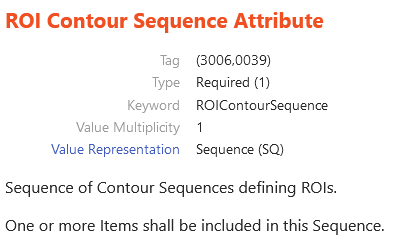

In [81]:
ds.ROIContourSequence

<Sequence, length 32>

`ds.ROIContourSequence` 是一个Sequence，其中每一项都是一个ROI

In [82]:
# 以第一项为例
print(type(ds.ROIContourSequence[0]))
ds.ROIContourSequence[0]

<class 'pydicom.dataset.Dataset'>


(3006, 002a) ROI Display Color                   IS: [34, 104, 175]
(3006, 0040)  Contour Sequence  22 item(s) ---- 
   (3006, 0016)  Contour Image Sequence  1 item(s) ---- 
      (0008, 1150) Referenced SOP Class UID            UI: CT Image Storage
      (0008, 1155) Referenced SOP Instance UID         UI: 1.3.12.2.1107.5.1.4.11008.30000019051306533151100015632
      ---------
   (3006, 0042) Contour Geometric Type              CS: 'CLOSED_PLANAR'
   (3006, 0046) Number of Contour Points            IS: "60"
   (3006, 0050) Contour Data                        DS: Array of 180 elements
   ---------
   (3006, 0016)  Contour Image Sequence  1 item(s) ---- 
      (0008, 1150) Referenced SOP Class UID            UI: CT Image Storage
      (0008, 1155) Referenced SOP Instance UID         UI: 1.3.12.2.1107.5.1.4.11008.30000019051306533151100015631
      ---------
   (3006, 0042) Contour Geometric Type              CS: 'CLOSED_PLANAR'
   (3006, 0046) Number of Contour Points            IS: "58

其中重要的有
* 颜色：`ROIDtsplayColor`
* 赋值：`ReferencedROINumber`
* 数据：`ContourSequence`

In [83]:
print(ds.ROIContourSequence[0].ROIDisplayColor)
print(ds.ROIContourSequence[0].ReferencedROINumber)

[34, 104, 175]
31


`ds.ROIContourSequence[0].ContourSequence`是一个序列，其中每一项都是一个Dataset，表示ROI的一个多边形区域（polygon）<br>
可以理解为器官在每一层的位置

In [84]:
ds.ROIContourSequence[0].ContourSequence

<Sequence, length 22>

In [85]:
print(type(ds.ROIContourSequence[0].ContourSequence[0]))
ds.ROIContourSequence[0].ContourSequence[0]

<class 'pydicom.dataset.Dataset'>


(3006, 0016)  Contour Image Sequence  1 item(s) ---- 
   (0008, 1150) Referenced SOP Class UID            UI: CT Image Storage
   (0008, 1155) Referenced SOP Instance UID         UI: 1.3.12.2.1107.5.1.4.11008.30000019051306533151100015632
   ---------
(3006, 0042) Contour Geometric Type              CS: 'CLOSED_PLANAR'
(3006, 0046) Number of Contour Points            IS: "60"
(3006, 0050) Contour Data                        DS: Array of 180 elements

每个Polygon通过边界点表示，存储在`ContourData`中: `ds.ROIContourSequence[0].ContourSequence[0].ContourData`<br>
例子中，这一层中的ROI的Polygon的Contour有60个点，每个点用三维坐标表示，共180个坐标，其中Z坐标相同为-808.9

In [86]:
print(type(ds.ROIContourSequence[0].ContourSequence[0].ContourData))
print(np.shape(ds.ROIContourSequence[0].ContourSequence[0].ContourData))
print(ds.ROIContourSequence[0].ContourSequence[0].ContourData)

<class 'pydicom.multival.MultiValue'>
(180,)
[55.796, -196.082, -808.9, 55.974, -197.248, -808.9, 56.462, -198.177, -808.9, 57.141, -198.772, -808.9, 57.891, -199.129, -808.9, 58.64, -199.486, -808.9, 59.319, -200.081, -808.9, 59.831, -201.009, -808.9, 60.176, -202.176, -808.9, 60.557, -203.342, -808.9, 61.318, -204.271, -808.9, 62.735, -204.842, -808.9, 64.651, -205.032, -808.9, 66.412, -204.854, -808.9, 67.507, -204.366, -808.9, 68.102, -203.699, -808.9, 68.65, -203.033, -808.9, 69.352, -202.497, -808.9, 70.269, -201.985, -808.9, 71.518, -201.128, -808.9, 73.03, -199.7, -808.9, 74.387, -197.927, -808.9, 75.315, -196.177, -808.9, 76.053, -194.582, -808.9, 76.838, -193.13, -808.9, 77.422, -191.857, -808.9, 77.505, -190.75, -808.9, 77.243, -189.667, -808.9, 76.934, -188.56, -808.9, 76.588, -187.632, -808.9, 76.077, -187.037, -808.9, 75.398, -186.632, -808.9, 74.648, -186.275, -808.9, 73.887, -186.096, -808.9, 73.125, -186.18, -808.9, 72.363, -186.263, -808.9, 71.602, -186.084, -808.9, 7

### StructureSetROISequence
Structure Set: A structure set defines a set of areas of significance. Each area can be associated with a Frame of Reference and zero or more images. Information that can be transferred with each region of interest (ROI) includes geometrical and display parameters, and generation technique.
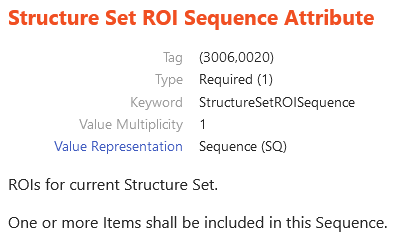

In [87]:
ds.StructureSetROISequence

<Sequence, length 32>

In [88]:
ds.StructureSetROISequence[0]

(3006, 0022) ROI Number                          IS: "31"
(3006, 0024) Referenced Frame of Reference UID   UI: 1.3.12.2.1107.5.1.4.11008.30000019051308052531500000047
(3006, 0026) ROI Name                            LO: 'Pancreas'
(3006, 0036) ROI Generation Algorithm            CS: 'SEMIAUTOMATIC'

其中重要的有：
* 数值：`ROINumber`
* 名称：`ROIName`

In [89]:
print(ds.StructureSetROISequence[0].ROINumber)
print(ds.StructureSetROISequence[0].ROIName)

31
Pancreas


### RTROIObservationsSequence
RT ROI Observations: The RT ROI Observations Module specifies the identification and interpretation of an ROI specified in the This module and ROI Contour Module.
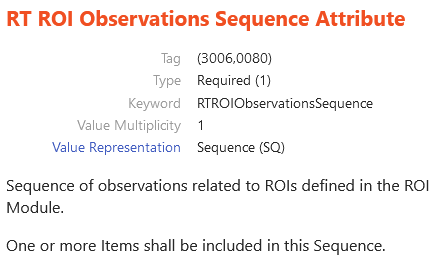

In [90]:
ds.RTROIObservationsSequence

<Sequence, length 32>

In [92]:
print(ds.RTROIObservationsSequence[0])

(3006, 0082) Observation Number                  IS: "31"
(3006, 0084) Referenced ROI Number               IS: "31"
(3006, 0085) ROI Observation Label               SH: 'Pancreas'
(3006, 00a4) RT ROI Interpreted Type             CS: 'ORGAN'
(3006, 00a6) ROI Interpreter                     PN: ''
(4001, 0010) Private Creator                     LO: 'Wistech Pirvate Creator'
(4001, 1002) Private tag data                    LO: 'ORGAN_AT_RISK'


其中重要的有：
* 数值：`ObservationNumber`, `ReferencedROINumber`
* 名称：`ROIObservationLabel`

In [94]:
print(ds.RTROIObservationsSequence[0].ObservationNumber)
print(ds.RTROIObservationsSequence[0].ReferencedROINumber)
print(ds.RTROIObservationsSequence[0].ROIObservationLabel)

31
31
Pancreas


### 总结

* 所有ROI具体数据保存在`ds.ROIContourSequence`中，其中有序号，但是没有名称
    * `ds.ROIContourSequence[i]`保存了其中第i个ROI
        * `ds.ROIContourSequence[i].ROIDisplayColor`保存了颜色
        * `ds.ROIContourSequence[i].ReferencedROINumber`保存了序号
        * `ds.ROIContourSequence[i].ContourSequence` 保存了组成该ROI的所有Polygen
            * `ds.ROIContourSequence[i].ContourSequence[j]`是第i个ROI的第j个Polygen
                * `ds.ROIContourSequence[i].ContourSequence[j].ContourData` 是这给Polygen的边界点坐标
* ROI的名称保存在(二选一即可)
    1. `ds.StructureSetROISequence[i].ROIName`中，对应ID为`ds.StructureSetROISequence[i].ROINumber`
    1. `ds.RTROIObservationsSequence[i].ROIObservationLabel`中，对应ID为`ds.RTROIObservationsSequence[i].ObservationNumber`    

`ds.ROIContourSequence`序列与`ds.StructureSetROISequence`序列的顺序是相同的

In [98]:
for i in range(len(ds.ROIContourSequence)):
    assert ds.ROIContourSequence[i].ReferencedROINumber == ds.StructureSetROISequence[i].ROINumber

## 总结
* 利用pydicom可以读取`RTSTRUCT.dcm`文件，提取出所有器官（ROI）的数据，包括名称、序号、边界点
* 边界（contour）格式需转换为格点（mesh）格式，即可保存为数组形式
* RT STRUCT 文件中，边界点的坐标是物理值，但是文件中并不包含原始图像的sickness、spacing等数据，要保存为医学图像需要结合原始序列提取sickness、spacing、orintation等信息

# Polygon：Contour2mesh
利用`skimage.draw.polygon()`实现从边界点坐标到mesh

In [104]:
import skimage
from skimage.draw import polygon
import numpy as np

In [105]:
img = np.zeros((10, 10), dtype=np.uint8)
r = np.array([1, 2, 8])
c = np.array([1, 7, 4])
rr, cc = polygon(r, c)
img[rr, cc] = 1

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

# 实现

In [20]:
import pydicom
import SimpleITK as sitk
import numpy as np
from skimage.draw import polygon
import matplotlib.pyplot as plt

In [2]:
# 导入RTSTRUCT
structure = pydicom.dcmread(r"E:\SS-DCMProcessor\dataset\CT1\RTSTRUCT.dcm")
contour = {}
contour['number'] = structure.ROIContourSequence[0].ReferencedROINumber
contour['name'] = structure.StructureSetROISequence[0].ROIName
contour['contours'] = structure.ROIContourSequence[0].ContourSequence[0].ContourData
contour['contours']

[55.796, -196.082, -808.9, 55.974, -197.248, -808.9, 56.462, -198.177, -808.9, 57.141, -198.772, -808.9, 57.891, -199.129, -808.9, 58.64, -199.486, -808.9, 59.319, -200.081, -808.9, 59.831, -201.009, -808.9, 60.176, -202.176, -808.9, 60.557, -203.342, -808.9, 61.318, -204.271, -808.9, 62.735, -204.842, -808.9, 64.651, -205.032, -808.9, 66.412, -204.854, -808.9, 67.507, -204.366, -808.9, 68.102, -203.699, -808.9, 68.65, -203.033, -808.9, 69.352, -202.497, -808.9, 70.269, -201.985, -808.9, 71.518, -201.128, -808.9, 73.03, -199.7, -808.9, 74.387, -197.927, -808.9, 75.315, -196.177, -808.9, 76.053, -194.582, -808.9, 76.838, -193.13, -808.9, 77.422, -191.857, -808.9, 77.505, -190.75, -808.9, 77.243, -189.667, -808.9, 76.934, -188.56, -808.9, 76.588, -187.632, -808.9, 76.077, -187.037, -808.9, 75.398, -186.632, -808.9, 74.648, -186.275, -808.9, 73.887, -186.096, -808.9, 73.125, -186.18, -808.9, 72.363, -186.263, -808.9, 71.602, -186.084, -808.9, 70.84, -185.763, -808.9, 70.078, -185.608, -80

In [4]:
# 导入原始图像
# ids = sitk.ImageSeriesReader.GetGDCMSeriesIDs(r"E:\SS-DCMProcessor\dataset\CT1")
fnames = sitk.ImageSeriesReader.GetGDCMSeriesFileNames(r"E:\SS-DCMProcessor\dataset\CT1")
reader = sitk.ImageSeriesReader()
reader.SetFileNames(fnames)
img = reader.Execute()

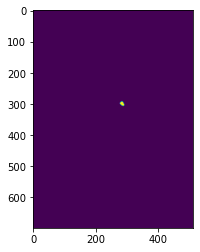

In [22]:
contour_physical_points = np.array(contour['contours']).reshape(-1, 3)
contour_index = [img.TransformPhysicalPointToIndex(p) for p in contour_physical_points]
r = np.array(contour_index)[:, 0]
c = np.array(contour_index)[:, 1]
rr, cc = polygon(r, c)
seg = np.zeros_like(sitk.GetArrayFromImage(img))[:,:,0]
seg[rr, cc] = 1

plt.imshow(seg)

 # 调试

In [2]:
import sys
sys.path.append(r'E:\SS-DCMProcessor\utlis')
from RTStructProcess import RTStructExtractor
%load_ext autoreload
%autoreload 2

In [3]:
e = RTStructExtractor(r"E:\SS-DCMProcessor\dataset\CT1")
e.load_rtstruct()
e.load_image()
e.contours2mesh()
e.load_organ_ID(r'E:\SS-DCMProcessor\dataset\OrganID.xlsx')

contours2mesh: 100%|██████████| 32/32 [01:31<00:00,  2.85s/it, organ=TMJ_L]          


In [34]:
info = e.generate_seg(r"E:\SS-DCMProcessor\dataset\seg.nii")

filling organs: 100%|██████████| 43/43 [00:09<00:00,  4.77it/s, organ=Sigmoid]       


(512, 512, 698)
(512, 512, 698)


In [18]:
overlap = e.analyse_overlap()

100%|██████████| 32/32 [00:19<00:00,  1.61it/s]


[(('Pancreas', 9456), ('Bowel', 1518631), 6), (('Temporal_Lobe_L', 20897), ('Brain', 422280), 20883), (('Brain', 422280), ('Temporal_Lobe_R', 28656), 28477), (('Brain', 422280), ('Brain_Stem', 3808), 3808), (('Esophagus', 7676), ('Trachea', 14397), 160), (('Mandible', 20056), ('TMJ_R', 756), 5), (('Mandible', 20056), ('Oral_Cavity', 19188), 7), (('Liver', 669434), ('Bowel', 1518631), 16), (('Larynx', 16668), ('Thyroid_Gland', 4677), 4), (('Bowel', 1518631), ('Duodenum', 4156), 4), (('Lung_R', 464303), ('Lung_All', 859927), 464303), (('Eye_L', 2263), ('Len_L', 13), 13), (('Lung_All', 859927), ('Lung_L', 395624), 395624), (('Trachea', 14397), ('Thyroid_Gland', 4677), 6)]


In [19]:
overlap

[(('Pancreas', 9456), ('Bowel', 1518631), 6),
 (('Temporal_Lobe_L', 20897), ('Brain', 422280), 20883),
 (('Brain', 422280), ('Temporal_Lobe_R', 28656), 28477),
 (('Brain', 422280), ('Brain_Stem', 3808), 3808),
 (('Esophagus', 7676), ('Trachea', 14397), 160),
 (('Mandible', 20056), ('TMJ_R', 756), 5),
 (('Mandible', 20056), ('Oral_Cavity', 19188), 7),
 (('Liver', 669434), ('Bowel', 1518631), 16),
 (('Larynx', 16668), ('Thyroid_Gland', 4677), 4),
 (('Bowel', 1518631), ('Duodenum', 4156), 4),
 (('Lung_R', 464303), ('Lung_All', 859927), 464303),
 (('Eye_L', 2263), ('Len_L', 13), 13),
 (('Lung_All', 859927), ('Lung_L', 395624), 395624),
 (('Trachea', 14397), ('Thyroid_Gland', 4677), 6)]